# WITH PANDAS AND MATPLOTLIB

In [57]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

## 1: Plot number of people by gender

In [59]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [61]:
kill.gender.value_counts()


M    2428
F     107
Name: gender, dtype: int64

In [62]:
x = kill.gender.value_counts().index

x[0]

'M'

Text(0.5, 1.0, 'Gender Distribution')

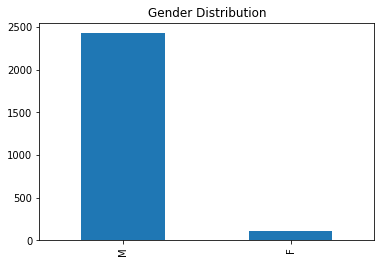

In [17]:
fig, ax = plt.subplots()  # çözüme pandas ile başladım.

kill.gender.value_counts().plot.bar(ax = ax) # pandasla matplotlibi burada birbirleri ile eşleştirdim.

ax.set_title("Gender Distribution")

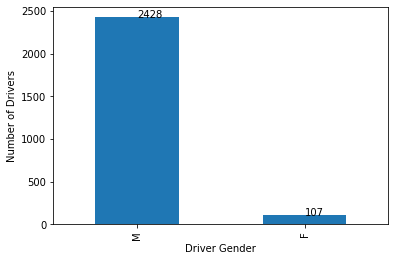

In [19]:
# C8329 Joseph hocanın çözümü 

plt.xlabel('Driver Gender')
plt.ylabel('Number of Drivers')
y = kill.gender.value_counts().values
x = kill.gender.value_counts().index
kill.gender.value_counts().plot.bar();
for index, value in enumerate(y): 
    plt.text(index, value, str(value))

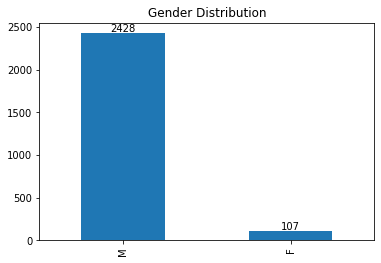

In [20]:
# hocanın başka bir çözümü

fig, ax = plt.subplots()

x = [0, 1]  # x = kill.gender.value_counts().index kullandığımda hata verdi. 

# x = kill.gender.value_counts().index
y = kill.gender.value_counts().values

kill.gender.value_counts().plot.bar(ax = ax) # pandasla matplotlibi burada birbirleri ile eşleştirdim.
ax.set_title("Gender Distribution")

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha="center", va="bottom" ) # burada .txt() içerde x ve y değeri olarak float değer bekliyor. fakat x Male veya Female olduğu için hata verdiği için öncesinde x'i [0,1] olarak tanımladım.

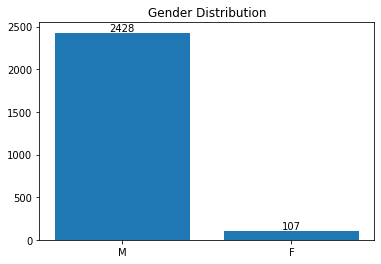

In [22]:
# hocanın başka bir çözümü

fig, ax = plt.subplots()

x = kill.gender.value_counts().index
y = kill.gender.value_counts().values

ax.bar(x, y)

ax.set_title("Gender Distribution")

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha="center", va="bottom" )

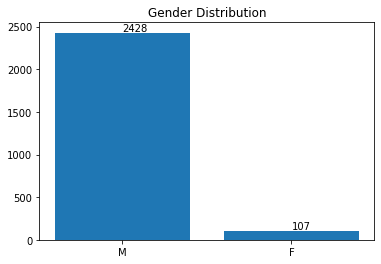

In [23]:
fig, ax = plt.subplots()

x = kill.gender.value_counts().index
y = kill.gender.value_counts().values

ax.bar(x,y )
ax.set_title("Gender Distribution")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.4, p.get_height()+20));

## 2: Plot 7 most common kill weapons

In [24]:
ax.patches

"""
String form: [<matplotlib.patches.Rectangle object at 0x00000236CBB0D188>, <matplotlib.patches.Rectangle object at 0x00000236C7F7FC88>]
Length:      2
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
"""

In [25]:
ax.patches[0].get_x()

-0.4

In [63]:
arm = kill.armed.value_counts()[:7]

arm

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [28]:
kill['armed'].value_counts().nlargest(n=7) # Evren hocanın kodu

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

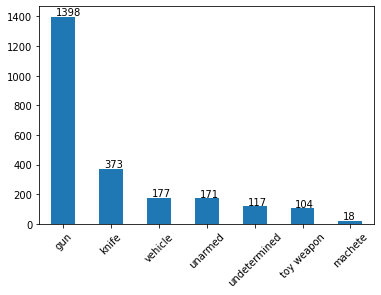

In [29]:
fig, ax = plt.subplots()

arm.plot(kind = "bar", ax = ax)

ax.set_xticklabels(arm.index, rotation = 45)

for p in ax.patches :
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

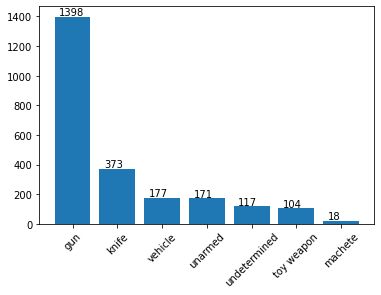

In [30]:
# 2.sorunun başka bir çözümü

fig, ax = plt.subplots()

x=arm.index
y=arm.values

ax.bar(x,y)
ax.set_xticklabels(arm.index, rotation = 45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

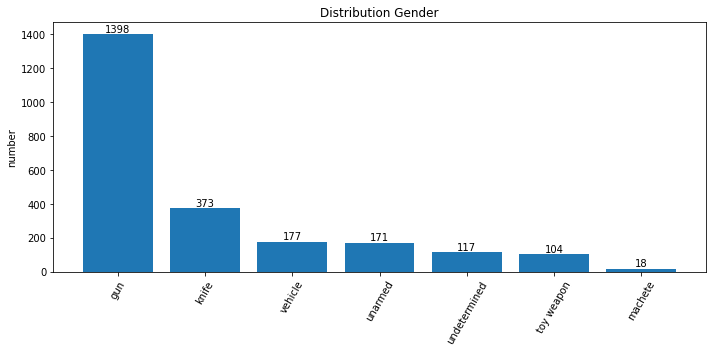

In [31]:
# 2.sorunun Joseph hocanın çözümü 
# with matplotlib

fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('number')
ax.set_title('Distribution Gender')
ax.bar(x,y)
plt.xticks(rotation = 60)
fig.tight_layout()
for index, value in enumerate(y):
    plt.text(index,value, str(value), ha = 'center', va= "bottom")

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [32]:
# ahmet hocanın kodu

kill['age_cat'] = (kill['age'] > 25)
kill.age_cat.replace({True: 'above25', False: 'below25'}, inplace= True)
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [39]:
# Hilmi hocanın kodu

kill["age_cat"] = np.where(kill["age"]>25,"above25", "under25")

kill["age_cat"].value_counts()

above25    1905
under25     630
Name: age_cat, dtype: int64

In [40]:
# Sam hocanın kodu

def age_cat(age):
    if age > 25.0:
        return "above25"
    else:
        return "below25"

kill["age_cat"] = kill["age"].apply(age_cat)

kill["age_cat"].value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

In [64]:
# zehra hocanın kodu

kill['age_cat']=kill['age'].apply(lambda x: 'above25' if x>25 else 'below25')

kill.head()

# kill['age_cat']=kill.age.apply(lambda x: 'above25' if x>25 else 'below25')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [73]:
# yaş değerleri arasında Null değerler de olduğundan onları other olarak tamıladık.

kill['age_cat'] = kill['age'].apply(lambda x: 'above25' if x>25 else ('below25' if x <= 25 else "other"))

b = kill["age_cat"][kill["age_cat"] == 'below25']

b.count()

553

In [46]:
under = kill[kill["age"] <= 25].count()

under[0]

553

In [47]:
upper = kill[kill["age"] > 25].count()

upper[0]

1905

In [65]:
kill.age.isnull().sum()

# age içinde 77 tane null değer var

77

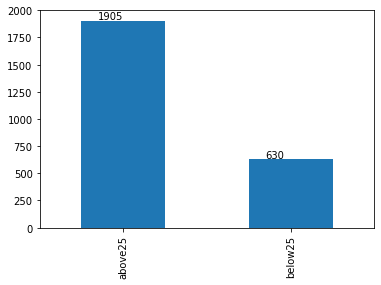

In [66]:
ax = kill.age_cat.value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

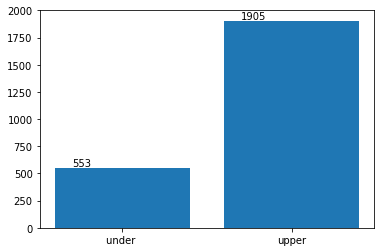

In [48]:
x = [under[0], upper[0]] # under ve upper'ın ilk değerleri olan 553 ve 1905 i plotlatmak istiyorum
y=["under ", "upper"]
fig , ax = plt.subplots()
ax.bar(y,x)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

In [35]:
kill.age_cat.value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

<AxesSubplot:>

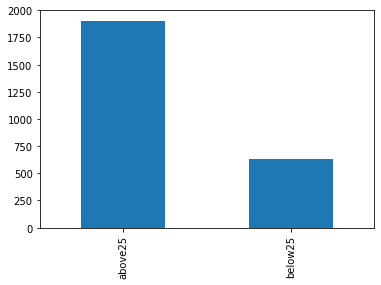

In [36]:
kill.age_cat.value_counts().plot.bar()  # pandas yaptım

## 4: Plot number of killed poeple by race

In [4]:
# LAB da hoca 4. soruyu yapmadı. 5'e geçti.

race=df.race.value_counts()
race

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

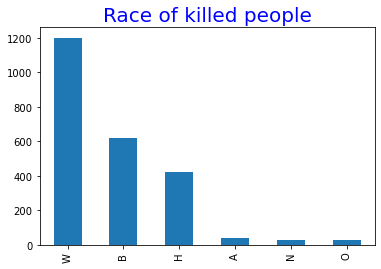

In [55]:
#with pandas
race.plot(kind='bar',fontsize=10);
plt.title('Race of killed people',color='blue',fontsize=20);


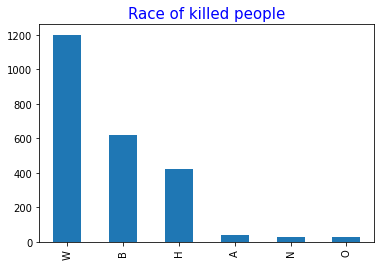

In [ ]:
# with pandas


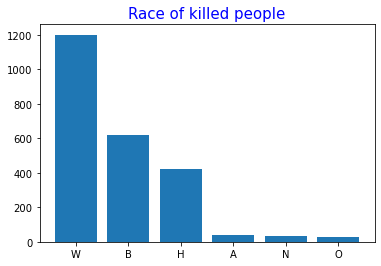

In [56]:
# with matplotlib
age=df['age_cat'].value_counts()
fig,ax=plt.subplots()
ax.bar(race.index,race);
ax.set_title('Race of killed people',color='blue',fontsize=15);


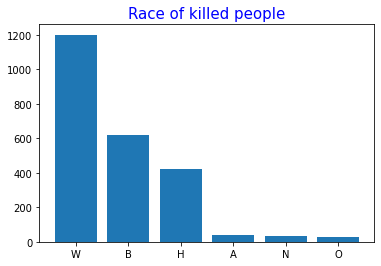

In [ ]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

In [54]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [49]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [50]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

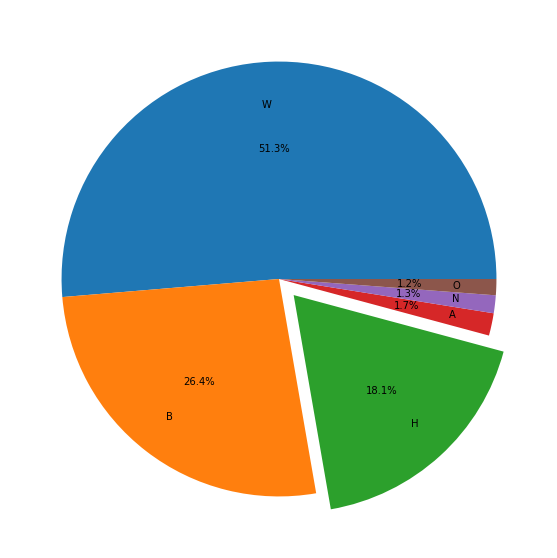

In [55]:
fig, ax = plt.subplots(figsize=(10,10))

x = kill.race.value_counts().values
label = kill.race.value_counts().index

ax.pie(x, labels= label,
      labeldistance=0.8,
        autopct= "%.1f%%",
    explode=[0,0,0.1,0,0,0]
      );

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [7]:
df.dropna(inplace=True)
df.shape

(2254, 15)

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [6]:
df.race.value_c ounts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [62]:
race_index=df.race.value_counts().index
race_index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [57]:
race_values=df.race.value_counts()
race_values

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

array([1168,  592,  401,   36,   29,   28])

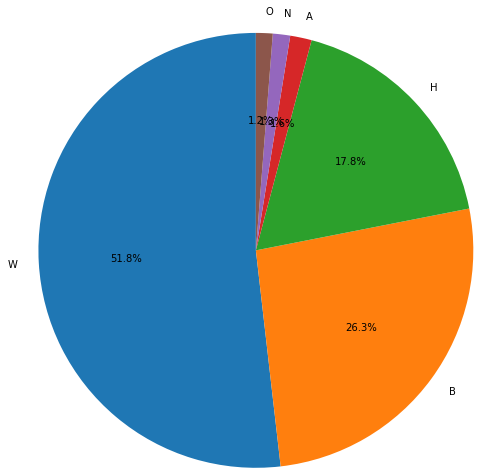

In [67]:
plt.pie(race_values,labels=race_index, startangle=90, autopct='%1.1f%%',radius=2.5)
plt.show()

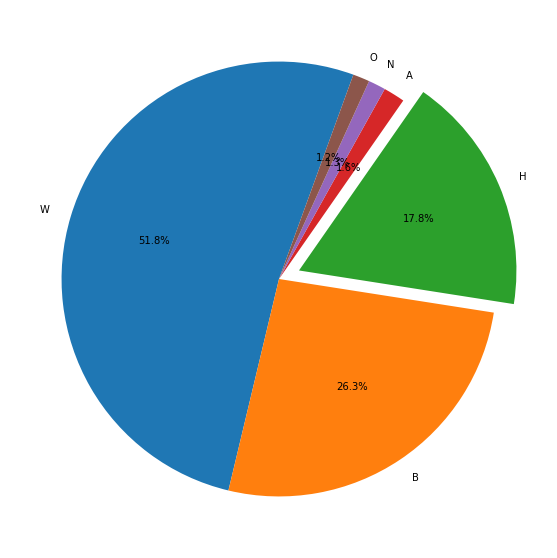

In [ ]:
# matplotlib



## 6: Most common 15 Name or Surname of killed people 

In [ ]:
#  bu soruyu hoca yarın (03 Temmuz 2021) çözecek 

In [23]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [7]:
df.shape

(2254, 15)

(2254, 15)

In [8]:
df1=df.copy()

In [64]:
df1.name

0               Tim Elliot
1         Lewis Lee Lembke
2       John Paul Quintero
3          Matthew Hoffman
4        Michael Rodriguez
               ...        
2523     Kesharn K. Burney
2525      Deltra Henderson
2528    Alejandro Alvarado
2533         Isaiah Tucker
2534          Dwayne Jeune
Name: name, Length: 2340, dtype: object

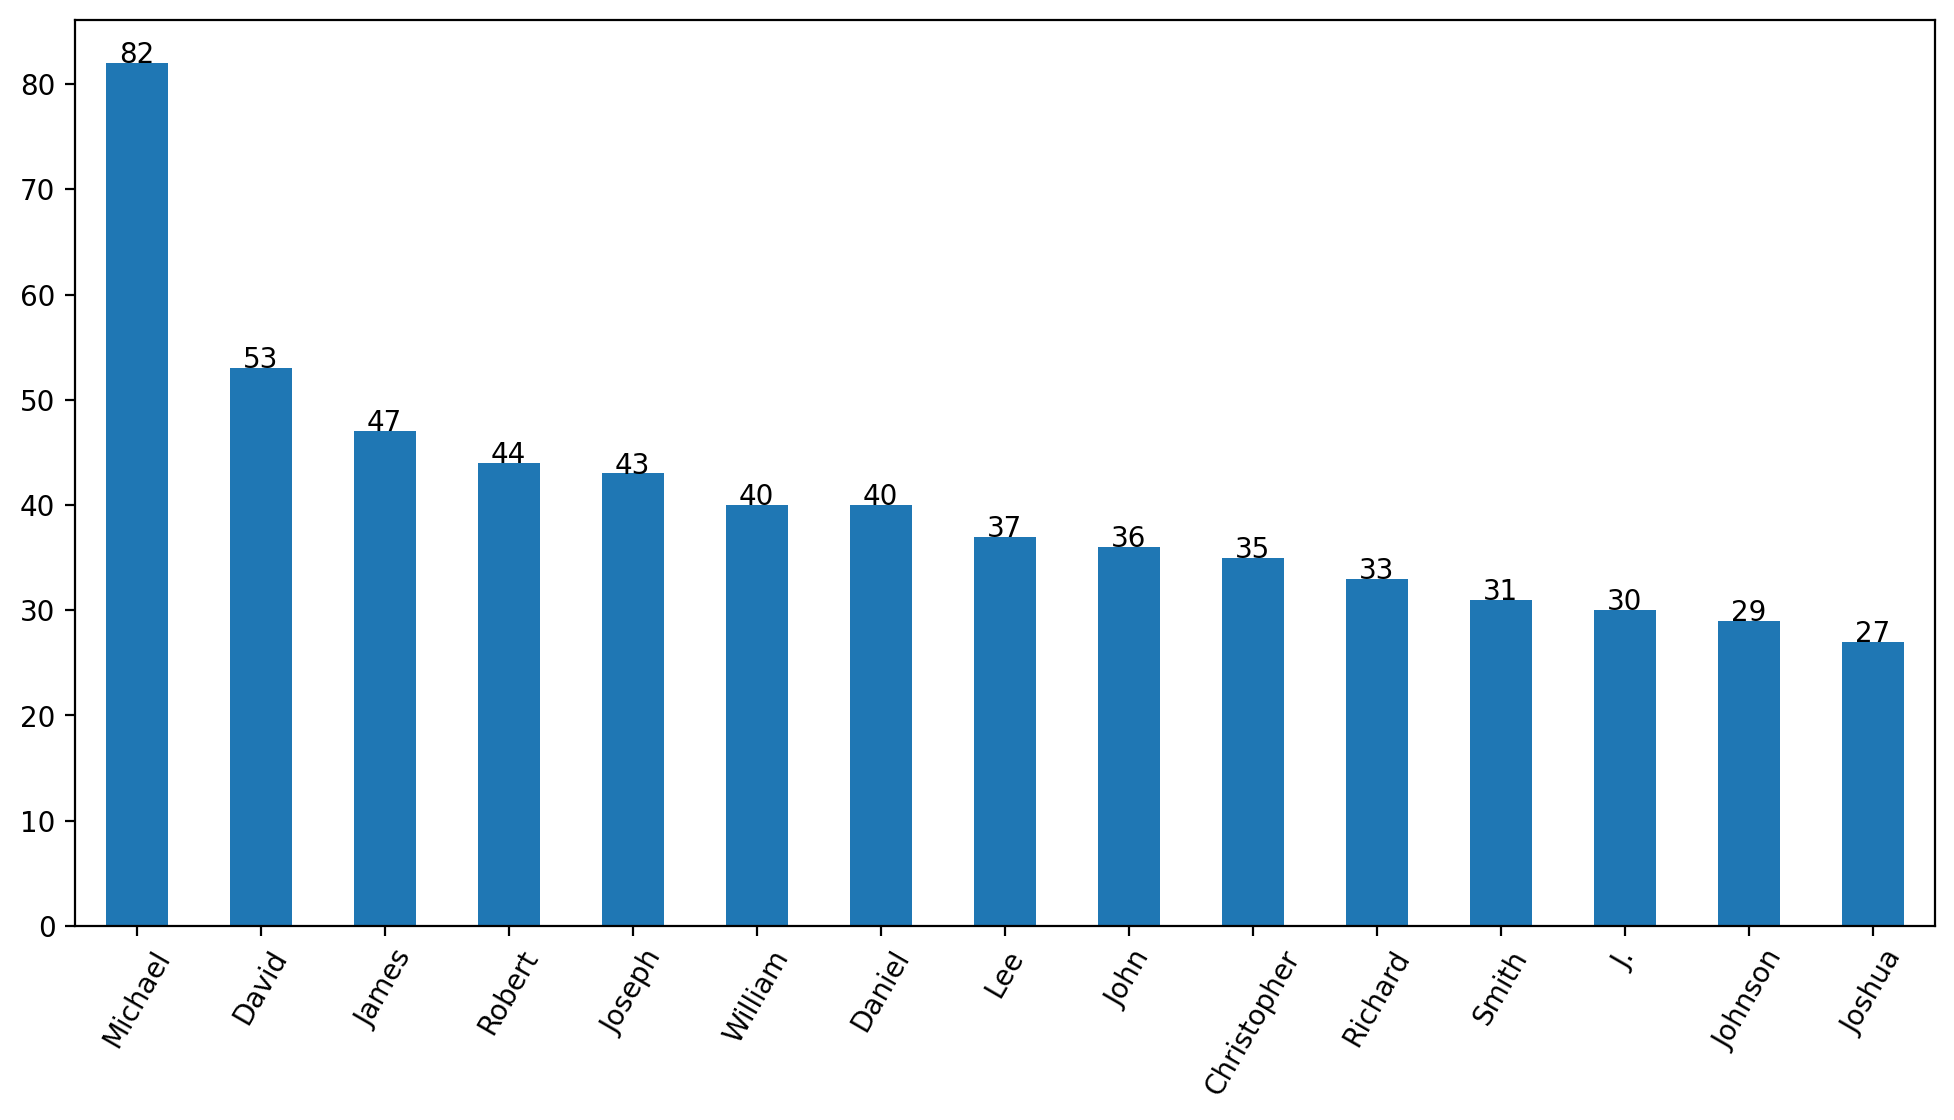

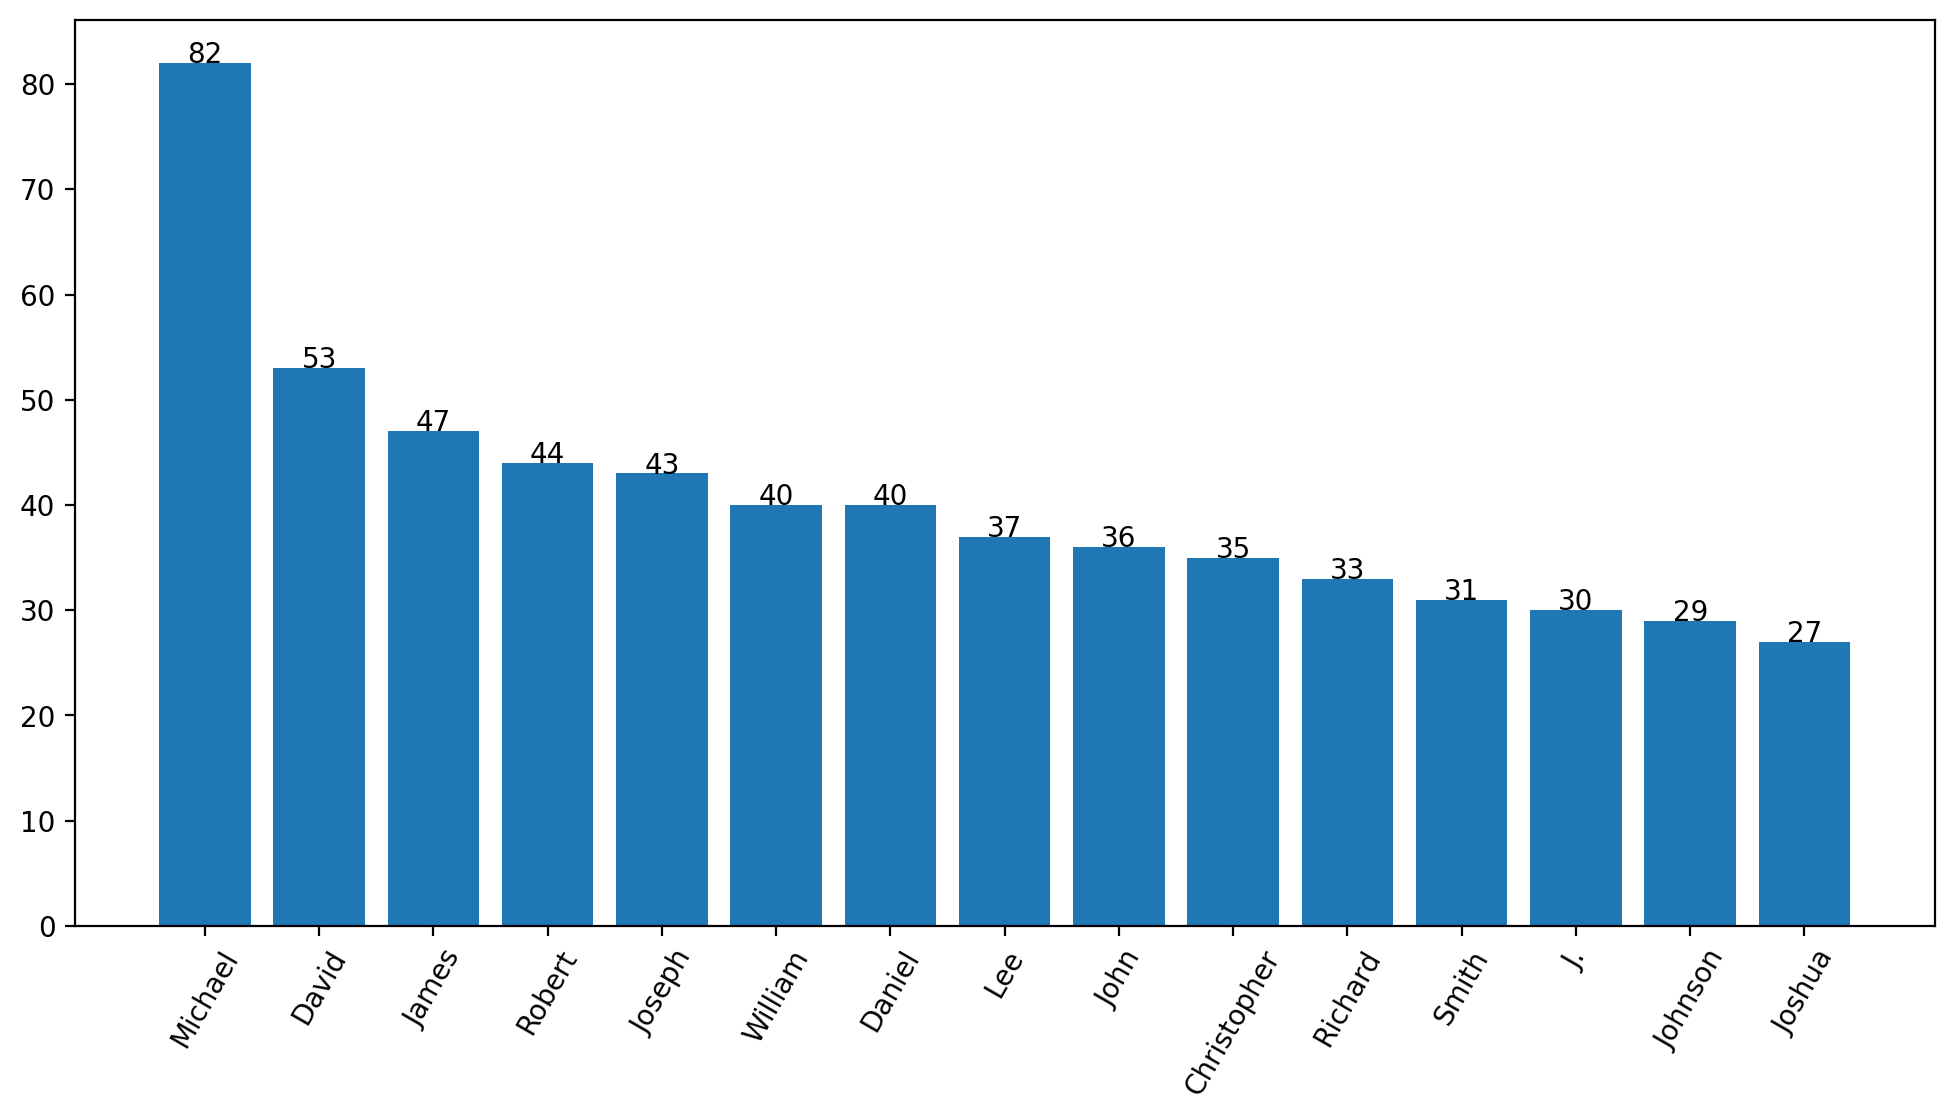

In [9]:
a = df1.name.str.split()
b = [j for i in a for j in i]
c = {i:b.count(i) for i in set(b) }
common_names = pd.Series(c).sort_values(ascending=False)[:15]
plt.figure(figsize=(12,6), dpi = 200)
common_names.plot.bar();
for index, value in enumerate(common_names.values):
    plt.text(index, value, str(value), ha = 'center')
plt.xticks(rotation = 60);
plt.figure(figsize=(12,6), dpi = 200)
plt.bar(common_names.index, common_names.values);
for index, value in enumerate(common_names.values):
    plt.text(index, value, str(value), ha = 'center')
plt.xticks(rotation = 60);

In [9]:
df1.name.value_counts()

Michael Brown                2
Daquan Antonio Westbrook     2
Brandon Jones                2
Michael Johnson              2
Eric Harris                  2
                            ..
William Evans                1
Antonio Gerardo Rodriguez    1
Larry Hostetter              1
Barry Jones                  1
Dylan M. Dalzell             1
Name: name, Length: 2249, dtype: int64

In [241]:
df1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [11]:
name_list=df1.name.str.split()
name_list


0                [Tim, Elliot]
1         [Lewis, Lee, Lembke]
2       [John, Paul, Quintero]
3           [Matthew, Hoffman]
4         [Michael, Rodriguez]
                 ...          
2519            [Aries, Clark]
2523     [Kesharn, K., Burney]
2525       [Deltra, Henderson]
2533          [Isaiah, Tucker]
2534           [Dwayne, Jeune]
Name: name, Length: 2254, dtype: object

In [28]:
np.array(name_list).shape

(2340,)

In [10]:
a.shape

(2254,)

In [15]:

x=[j for i in a for j in i]

In [12]:
np.array(x).shape

(4938,)

In [16]:
x1=[]
for i in range(len(x)):
    if '-' in x[i]:
        x1.extend(x[i].split('-'))
    else:
        x1.append(x[i])

In [88]:
np.array(x1).shape

(4938,)

In [259]:
x[0]

'Tim'

In [17]:
dict={}
for i in x1:
    dict[i]=x1.count(i)

In [18]:
dict

{'Tim': 3,
 'Elliot': 1,
 'Lewis': 7,
 'Lee': 37,
 'Lembke': 1,
 'John': 36,
 'Paul': 16,
 'Quintero': 2,
 'Matthew': 22,
 'Hoffman': 2,
 'Michael': 82,
 'Rodriguez': 15,
 'Kenneth': 17,
 'Joe': 9,
 'Brown': 17,
 'Arnold': 2,
 'Buck': 3,
 'Brock': 2,
 'Nichols': 3,
 'Autumn': 1,
 'Steele': 1,
 'Leslie': 2,
 'Sapp': 2,
 'III': 9,
 'Patrick': 13,
 'Wetter': 1,
 'Ron': 2,
 'Sneed': 1,
 'Hashim': 1,
 'Hanif': 1,
 'Ibn': 1,
 'Abdul': 2,
 'Rasheed': 1,
 'Nicholas': 13,
 'Ryan': 16,
 'Brickman': 1,
 'Omarr': 1,
 'Julian': 3,
 'Maximillian': 1,
 'Jackson': 9,
 'Loren': 3,
 'Simpson': 4,
 'James': 47,
 'Dudley': 1,
 'Barker': 2,
 'Artago': 1,
 'Damon': 6,
 'Howard': 3,
 'Thomas': 24,
 'Hamby': 1,
 'Jimmy': 5,
 'Foreman': 1,
 'Andy': 1,
 'Martinez': 11,
 'Tommy': 3,
 'Smith': 31,
 'Brian': 9,
 'Barbosa': 1,
 'Salvador': 4,
 'Figueroa': 2,
 'Edward': 15,
 "O'Keefe": 1,
 'Richard': 33,
 'McClendon': 2,
 'Marcus': 4,
 'Golden': 1,
 'Goebel': 1,
 'Mario': 8,
 'Jordan': 5,
 'Talbot': 1,
 'Schroeder':

In [19]:
new=pd.DataFrame(pd.Series(dict)).reset_index()
new.columns=['name&surname','frequency']

In [20]:
new.head()

,name&surname,frequency
0,Tim,3
1,Elliot,1
2,Lewis,7
3,Lee,37
4,Lembke,1


In [21]:
new.sort_values(by='frequency',ascending=False,inplace=True)

In [22]:
new.head()

,name&surname,frequency
10,Michael,82
143,David,53
42,James,47
71,Robert,44
205,Joseph,44


In [ ]:
# Problem: TK TK is most probably not a name or surname. We will clean them.


0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [ ]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

shape

(2253,)

['Tim', 'Elliot']

'Tim'

5339

Counter({'Tim': 3,
         'Elliot': 1,
         'Lewis': 7,
         'Lee': 37,
         'Lembke': 1,
         'John': 36,
         'Paul': 16,
         'Quintero': 2,
         'Matthew': 22,
         'Hoffman': 2,
         'Michael': 82,
         'Rodriguez': 13,
         'Kenneth': 17,
         'Joe': 9,
         'Brown': 17,
         'Arnold': 2,
         'Buck': 3,
         'Brock': 2,
         'Nichols': 3,
         'Autumn': 1,
         'Steele': 1,
         'Leslie': 2,
         'Sapp': 2,
         'III': 9,
         'Patrick': 13,
         'Wetter': 1,
         'Ron': 2,
         'Sneed': 1,
         'Hashim': 1,
         'Hanif': 1,
         'Ibn': 1,
         'Abdul-Rasheed': 1,
         'Nicholas': 13,
         'Ryan': 16,
         'Brickman': 1,
         'Omarr': 1,
         'Julian': 3,
         'Maximillian': 1,
         'Jackson': 9,
         'Loren': 3,
         'Simpson': 4,
         'James': 47,
         'Dudley': 1,
         'Barker': 2,
         'Artago': 1,
     

[('Michael', 82),
 ('David', 53),
 ('James', 47),
 ('Robert', 44),
 ('Joseph', 43),
 ('Daniel', 40),
 ('William', 40),
 ('Lee', 37),
 ('John', 36),
 ('Christopher', 35),
 ('Richard', 33),
 ('Smith', 31),
 ('J.', 30),
 ('Johnson', 29),
 ('Joshua', 27)]

,name_or_surname_most_frequency,frequency
0,Michael,82
1,David,53
2,James,47
3,Robert,44
4,Joseph,43
5,Daniel,40
6,William,40
7,Lee,37
8,John,36
9,Christopher,35


In [23]:
new.head(15)['frequency'].values

array([82, 53, 47, 44, 44, 40, 40, 37, 36, 35, 33, 31, 30, 30, 27],
      dtype=int64)

<AxesSubplot:>

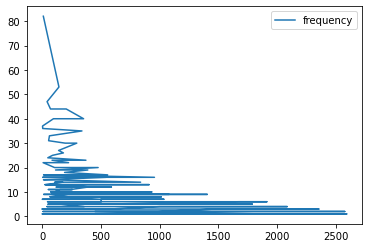

In [24]:
new.plot()

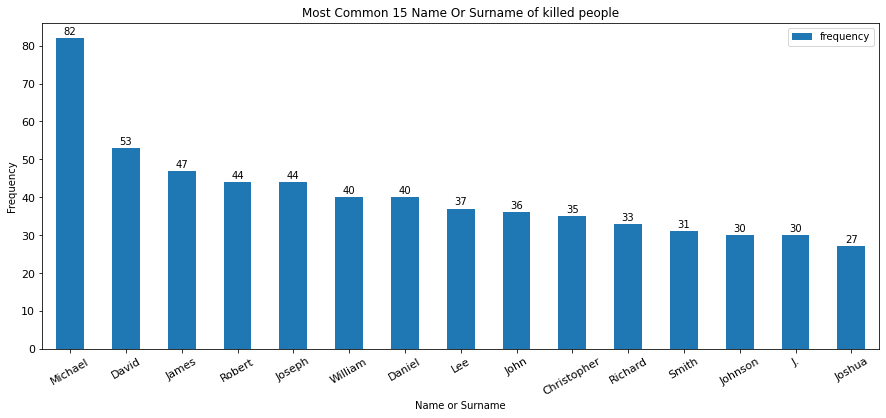

In [25]:
#with pandas
new.head(15).plot(kind='bar',x='name&surname',y='frequency',rot=30,fontsize=11,figsize=(15,6),\
                  title='Most Common 15 Name Or Surname of killed people',ylabel='Frequency',xlabel='Name or Surname');

for index,data in enumerate(new.head(15)['frequency'].values):
    plt.text(x=index , y =data+1,s=f"{data}",horizontalalignment='center')

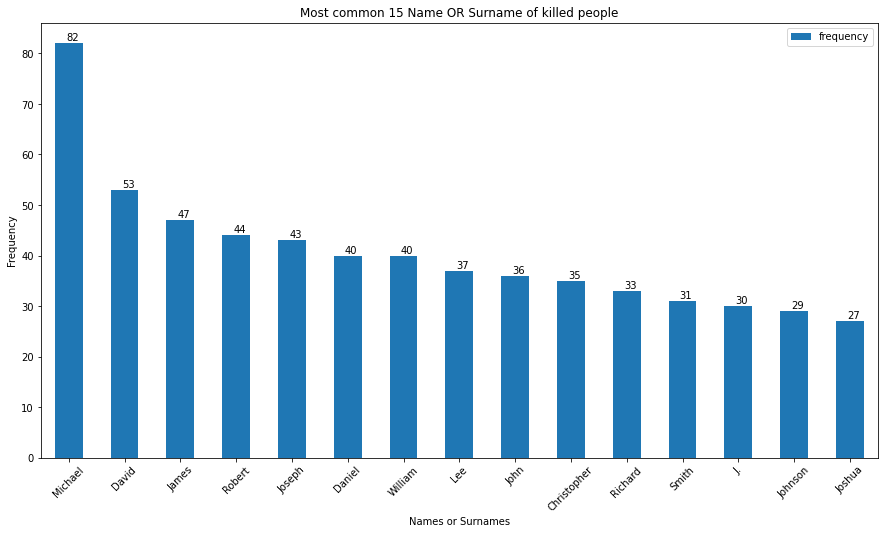

In [ ]:
# with pandas


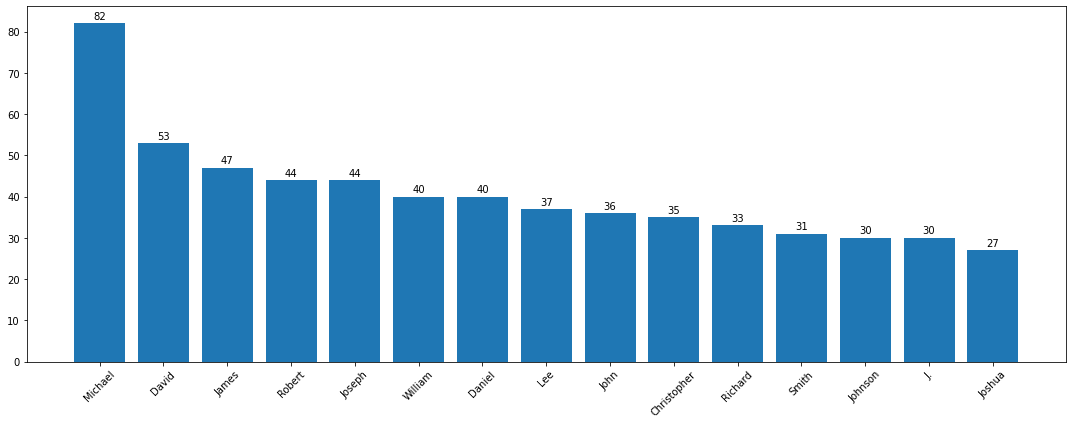

In [26]:
# with matplotlib
fig,ax=plt.subplots(figsize=(15,6))
ax.bar(new.head(15)['name&surname'],new.head(15)['frequency'])
plt.xticks(rotation=45)
for index,data in enumerate(new.head(15)['frequency']):
    ax.text(x=index , y =data+1,s=f"{data}",horizontalalignment='center')
plt.tight_layout()

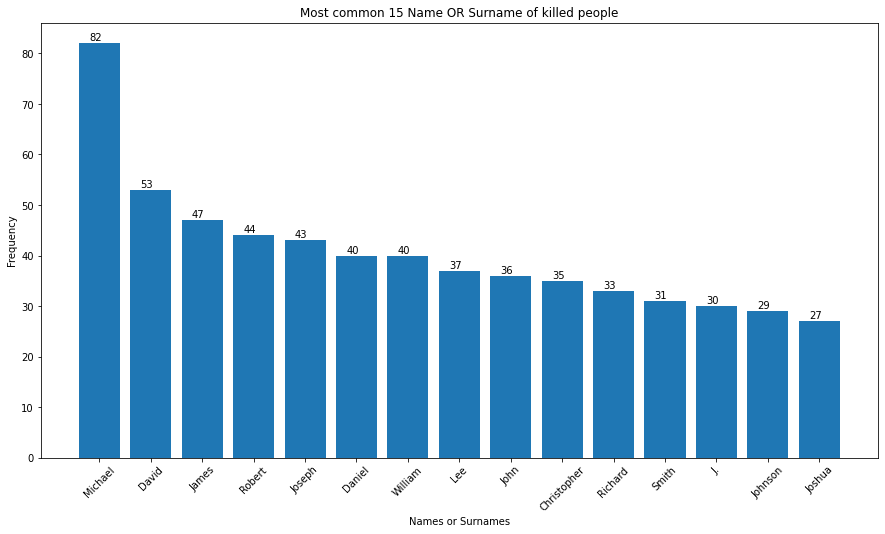

In [ ]:
# with matplotlib
